In [43]:
import sqlite3
import pandas as pd
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#reading the csv data 
commerce_df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

In [3]:
#checking the shape of the dataframe
commerce_df.shape

(541909, 8)

In [4]:
#checking the dataframe attributes
commerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
#Let's perform an eda
commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#let me check unique column,so as to specify an index
commerce_df.InvoiceDate.nunique()

23260

In [7]:
#no unique column in the dataset
#Let's create an index, using s/n
commerce_df['index_col'] = range(1, len(commerce_df) +1)

In [8]:
commerce_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'index_col'],
      dtype='object')

In [9]:
commerce_df.index_col.nunique()

541909

In [10]:
commerce_df.set_index('index_col', inplace = True)

In [11]:
commerce_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
index_col,,,,,,,,
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
#check each columns first for data cleaning
commerce_df.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [13]:
#checking missing values
commerce_df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [14]:
#two columns have null values, customerid and description
commerce_df.isna().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [15]:
#let's fill out or drop these rows. It is important that we keep rows, as some data are very important.
commerce_df.Description.fillna("No_description", inplace= True)

In [16]:
commerce_df.CustomerID.isna().sum()

135080

In [17]:
commerce_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [17]:
#dropping rows with null customer_id
#commerce_df.dropna(subset = ['CustomerID'], inplace = True)

In [18]:
commerce_df.shape

(541909, 8)

In [19]:
commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 1 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [20]:
#convert the Invoice date to datetime
commerce_df['InvoiceDate'] = pd.to_datetime(commerce_df['InvoiceDate'])

In [21]:
commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 1 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [22]:
commerce_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [23]:
#returned goods
commerce_df[commerce_df.Quantity > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
index_col,,,,,,,,
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France


In [24]:
#negative values in quantity has to be an error.

In [24]:
commerce_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
index_col,,,,,,,,
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France


In [25]:
#Questions to be asked
commerce_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Most sold products
Top customers - by no of products bought
Most profitable Day of the week
Most non-profitable day of the week
Total number of orders by some days
For free prices, did it encourage the customers to come back
Grouped by country - most profitable country - consider total amount sold pls
Top selling products in a specific country
Top selling product day for a specific country also
Total earnings in a year


In [26]:
commerce_df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [27]:
commerce_df['Country'].nunique()

38

In [28]:
commerce_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [29]:
#creating additional columns
commerce_df['Totalamount_spent'] = commerce_df['Quantity'] * commerce_df['UnitPrice']

In [30]:
commerce_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalamount_spent
index_col,,,,,,,,,
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [30]:
commerce_df['Quantity'].sum()

5176450

In [31]:
commerce_df['Totalamount_spent'].sum()

9747747.933999998

In [32]:
commerce_df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4224, dtype: int64

In [34]:
commerce_df.groupby('Country').sum()['Totalamount_spent'].sort_values(ascending = False)

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

In [35]:
commerce_df.groupby('Country')['Totalamount_spent'].mean().sort_values(ascending = False)

Country
Netherlands             120.059696
Australia               108.877895
Japan                    98.716816
Sweden                   79.211926
Denmark                  48.247147
Lithuania                47.458857
Singapore                39.827031
Lebanon                  37.641778
Brazil                   35.737500
Hong Kong                35.128611
Norway                   32.378877
Greece                   32.263836
Finland                  32.124806
EIRE                     32.122599
Bahrain                  28.863158
Switzerland              28.164510
United Arab Emirates     27.974706
Israel                   26.625657
Channel Islands          26.499063
Austria                  25.322494
Canada                   24.280662
Iceland                  23.681319
Czech Republic           23.590667
Germany                  23.348943
France                   23.069288
Spain                    21.624390
European Community       21.176230
Poland                   21.152903
Italy       

In [37]:
commerce_df.groupby('Country').sum()['Quantity'].sort_values(ascending = False)

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [38]:
commerce_df.groupby('Country').mean()['Quantity'].sort_values(ascending = False)

Country
Netherlands             84.406580
Sweden                  77.136364
Japan                   70.441341
Australia               66.444003
Singapore               22.855895
Denmark                 21.048843
Czech Republic          19.733333
Lithuania               18.628571
Canada                  18.298013
Norway                  17.722836
EIRE                    17.403245
Hong Kong               16.559028
Finland                 15.346763
Switzerland             15.147353
Israel                  14.656566
United Arab Emirates    14.441176
Bahrain                 13.684211
Iceland                 13.505495
France                  12.911067
Channel Islands         12.505277
Germany                 12.369458
Austria                 12.037406
Belgium                 11.189947
Brazil                  11.125000
Poland                  10.712610
Greece                  10.657534
Portugal                10.651745
Spain                   10.589814
Cyprus                  10.155949
Italy 

In [39]:
commerce_df.groupby('Country').sum()['Quantity'].sort_values(ascending = False).head(10)

Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

In [40]:
commerce_df.groupby('Country').sum()['Quantity'].sort_values(ascending = True).head()

Country
Saudi Arabia     75
Bahrain         260
RSA             352
Brazil          356
Lebanon         386
Name: Quantity, dtype: int64

#customers with highest purchasing power
Most sold products
Top customers - by no of products bought
Most profitable Day of the week
Most non-profitable day of the week
Total number of orders by some days
For free prices, did it encourage the customers to come back
Grouped by country - most profitable country - consider total amount sold pls
Top selling products in a specific country
Top selling product day for a specific country also
Total earnings in a year

In [33]:
Path('commerce_df.db').touch()
commerce_conn = sqlite3.connect('commerce_df.db')
commerce_c = commerce_conn.cursor()

In [42]:
commerce_df.to_sql('commerce_df', commerce_conn, if_exists='append', index=False)

541909

In [36]:
pd.read_sql('''SELECT Description, Quantity
                   FROM commerce_df
                    Where description is not null
                   ORDER BY Quantity DESC
                   LIMIT 20
''',commerce_conn )


#pd.read_sql(''' SELECT * FROM billion_dat LIMIT 10 ''', billion_conn)

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,74215
2,ASSTD DESIGN 3D PAPER STICKERS,12540
3,No_description,5568
4,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
5,SMALL POPCORN HOLDER,4300
6,?,4000
7,EMPIRE DESIGN ROSETTE,3906
8,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186
9,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114


In [37]:
pd.read_sql('''SELECT Description, Quantity, Totalamount_spent
                   FROM commerce_df
                   ORDER BY 3 DESC,2 DESC
                   LIMIT 20
''',commerce_conn )

,Description,Quantity,Totalamount_spent
0,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
1,MEDIUM CERAMIC TOP STORAGE JAR,74215,77183.60
2,PICNIC BASKET WICKER 60 PIECES,60,38970.00
3,AMAZON FEE,1,13541.33
4,Adjust bad debt,1,11062.06
5,POSTAGE,1,8142.75
6,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,7144.72
7,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,6539.40
8,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,6539.40
9,RABBIT NIGHT LIGHT,2400,4992.00


In [45]:
#Customers with highest purchasing power
pd.read_sql('''SELECT CustomerId, SUM(Totalamount_spent) AS total_spent
                   FROM commerce_df
                   WHERE CustomerId is not null
                   GROUP BY CustomerId
                   ORDER BY total_spent DESC
                   LIMIT 20
''',commerce_conn )

,CustomerID,total_spent
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45
5,14156.0,113384.14
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62653.10
9,15311.0,59419.34


In [74]:
#Most profitable day of the week
#Customers with highest purchasing power
pd.read_sql('''SELECT CustomerId, SUM(Quantity) AS total_goods
                   FROM commerce_df
                   GROUP BY CustomerId
                   ORDER BY total_goods DESC
                   LIMIT 20
''',commerce_conn )

,CustomerID,total_goods
0,14646.0,197491
1,16446.0,80997
2,14911.0,80515
3,12415.0,77670
4,12346.0,74215
5,17450.0,69993
6,17511.0,64549
7,18102.0,64124
8,13694.0,63312
9,14298.0,58343


In [48]:
commerce_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalamount_spent
index_col,,,,,,,,,
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [49]:
#month and year with the highest of order
pd.read_sql('''SELECT strftime("%Y %m", InvoiceDate) as Date,
                   COUNT(distinct(InvoiceNo)) AS Number_of_orders
                   FROM commerce_df
                   GROUP BY 1
                   ORDER BY 2 DESC
''',commerce_conn )

,Date,Number_of_orders
0,2011 11,3462
1,2011 10,2637
2,2011 09,2327
3,2011 05,2162
4,2010 12,2025
5,2011 06,2012
6,2011 03,1983
7,2011 07,1927
8,2011 04,1744
9,2011 08,1737


In [50]:
#month  with the highest amount of sales
pd.read_sql('''SELECT strftime("%Y %m", InvoiceDate) as Date,
                   SUM(totalamount_spent) AS total_revenue
                   FROM commerce_df
                   GROUP BY 1
                   ORDER BY 2 DESC
''',commerce_conn )

,Date,total_revenue
0,2011 11,1461756.250
1,2011 10,1070704.670
2,2011 09,1019687.622
3,2010 12,748957.020
4,2011 05,723333.510
5,2011 06,691123.120
6,2011 03,683267.080
7,2011 08,682680.510
8,2011 07,681300.111
9,2011 01,560000.260


In [51]:
#month  with the highest amount of sales
pd.read_sql('''SELECT strftime("%Y %m", InvoiceDate) as Date,
                   SUM(totalamount_spent) AS total_revenue
                   FROM commerce_df
                   GROUP BY 1
                   ORDER BY 2 DESC
                   LIMIT 5
''',commerce_conn )

,Date,total_revenue
0,2011 11,1461756.250
1,2011 10,1070704.670
2,2011 09,1019687.622
3,2010 12,748957.020
4,2011 05,723333.510


In [52]:
pd.read_sql('''SELECT strftime("%Y %m %d", InvoiceDate) as Date,
                   SUM(totalamount_spent) AS total_revenue
                   FROM commerce_df
                   GROUP BY 1
                   ORDER BY 2 DESC
                   LIMIT 1
''',commerce_conn )

,Date,total_revenue
0,2011 11 14,112141.11


In [53]:
pd.read_sql('''SELECT Country,
                   SUM(totalamount_spent) AS total_revenue
                   FROM commerce_df
                   GROUP BY 1
                   ORDER BY 2 DESC
                   limit 10
''',commerce_conn )

,Country,total_revenue
0,United Kingdom,8.187806e+06
1,Netherlands,2.846615e+05
2,EIRE,2.632768e+05
3,Germany,2.216982e+05
4,France,1.974039e+05
5,Australia,1.370773e+05
6,Switzerland,5.638535e+04
7,Spain,5.477458e+04
8,Belgium,4.091096e+04
9,Sweden,3.659591e+04


In [54]:
#the average revenue brought by the best selling product
pd.read_sql('''SELECT StockCode,
        Description,
        sum(Quantity) as NumOfSales,
        sum(totalamount_spent ) / count(distinct(InvoiceNo)) as AvgRevenue
        FROM
        commerce_df
        group by StockCode
        order by 3 desc
        limit 5''', commerce_conn)

,StockCode,Description,NumOfSales,AvgRevenue
0,22197,SMALL POPCORN HOLDER,56450,35.358856
1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,25.162833
2,85099B,JUMBO BAG RED RETROSPOT,47363,43.258094
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,38830,43.586153
4,84879,ASSORTED COLOUR BIRD ORNAMENT,36221,40.163304


In [57]:
pd.read_sql('''SELECT country, 
                   strftime("%Y %m", InvoiceDate) as Date,
                   SUM(totalamount_spent) AS total_revenue
                   FROM commerce_df
                   GROUP BY 1
                   ORDER BY 3 DESC
                   LIMIT 10
''',commerce_conn )

,Country,Date,total_revenue
0,United Kingdom,2010 12,8.187806e+06
1,Netherlands,2010 12,2.846615e+05
2,EIRE,2010 12,2.632768e+05
3,Germany,2010 12,2.216982e+05
4,France,2010 12,1.974039e+05
5,Australia,2010 12,1.370773e+05
6,Switzerland,2010 12,5.638535e+04
7,Spain,2010 12,5.477458e+04
8,Belgium,2010 12,4.091096e+04
9,Sweden,2010 12,3.659591e+04


In [41]:
commerce_df['day'] = commerce_df.InvoiceDate.dt.date
commerce_df['Month'] = commerce_df.InvoiceDate.dt.month
commerce_df['hour'] = commerce_df.InvoiceDate.dt.hour


In [65]:
commerce_df['year'] = commerce_df.InvoiceDate.dt.year

In [ ]:
commerce_df['']

<AxesSubplot:xlabel='day', ylabel='Totalamount_spent'>

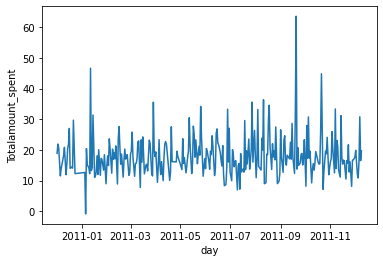

In [47]:
sns.lineplot(x = 'day', y = 'Totalamount_spent', data = commerce_df, ci = None, markers = True)

<AxesSubplot:xlabel='Month', ylabel='Totalamount_spent'>

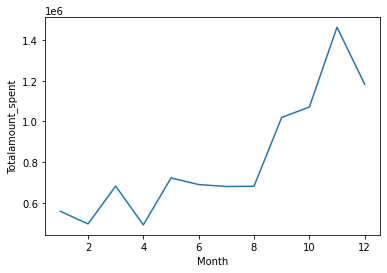

In [61]:
revenue_month = commerce_df.groupby('Month')['Totalamount_spent'].sum().reset_index().sort_values('Totalamount_spent')
sns.lineplot(x = 'Month', y = 'Totalamount_spent', data = revenue_month, ci = None)

In [52]:
country_revenue = commerce_df.groupby("Month")['Totalamount_spent'].sum().sort_values(ascending= False)


In [50]:
country_orders

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

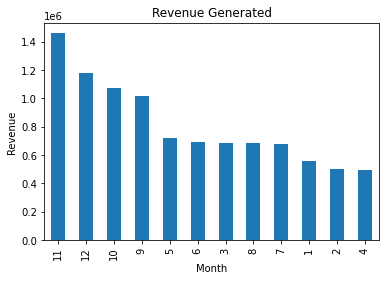

In [59]:
country_orders.plot(kind='bar')
plt.xlabel('Month',fontsize=10)
plt.ylabel('Revenue')
plt.title('Revenue Generated')
plt.show()

<AxesSubplot:xlabel='Month', ylabel='InvoiceNo'>

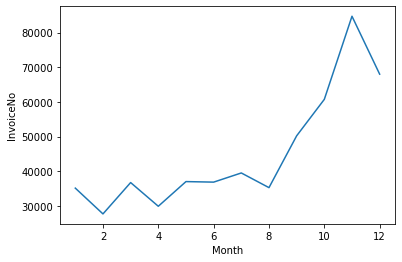

In [63]:
orders = commerce_df.groupby('Month')['InvoiceNo'].count().reset_index().sort_values('InvoiceNo')

sns.lineplot(x = 'Month', y = 'InvoiceNo', data = orders, ci = None)

<AxesSubplot:xlabel='year'>

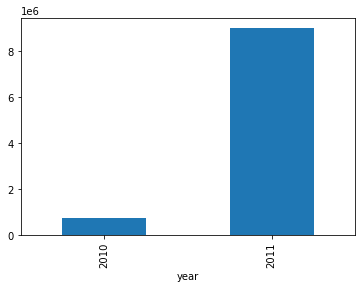

In [69]:
commerce_df.groupby('year')['Totalamount_spent'].sum().plot(kind = 'bar')